<a href="https://colab.research.google.com/github/GauravG2/AirBnB-NYC-2019-EDA/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

Most number of AirBnBs?
Room-wise number of airbnbs in each area?

Area - wise price distribution? Which helps us understand the probability of the price in each area


If I were to buy and host an AirBnb in Staten Island? most popular area? most popular type of room? 
I want to host a private room in Brooklyn, Harlem. What price should I set?


Relation between setting the right price and number of reviews
Relation between setting the right minimum nights and number of reviews

Room type wise mean price range
Below Mean price range
Above Mean price range

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF8')

import plotly.express as px



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading the data into python
file_path = '/content/drive/MyDrive/Data/Copy of Airbnb NYC 2019.csv'
df = pd.read_csv(file_path)

In [5]:
#Understanding the data
print(df.shape)
print(df.info())
(df.head())

(48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review         

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [8]:
#Understanding null values

df[(df["reviews_per_month"].isnull())] #To find null values in the column

def Change_to_0 (column): #To change the null values to 0
  if column != column:
    column = 0
  return column

df["reviews_per_month"] = df["reviews_per_month"].apply(Change_to_0)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


<Figure size 720x360 with 0 Axes>

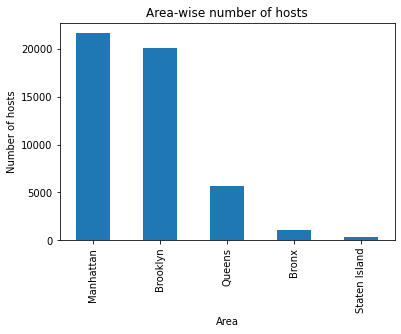

<Figure size 720x360 with 0 Axes>

In [6]:
#Let's start visualising the data
#Finding the number of hosts in each area
Neighbourhood = df["neighbourhood_group"].value_counts() 
Neighbourhood.sort_values(ascending = True)
print(Neighbourhood)


Neighbourhood.plot(kind = 'bar')

plt.title('Area-wise number of hosts')
plt.ylabel('Number of hosts')
plt.xlabel('Area')
plt.figure(figsize=(10,5))

In [7]:
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude",
                        color_continuous_scale=["orange", "red",
                                         "green", "blue",
                                         "purple"], zoom=10, height=500, color= "neighbourhood_group", width = 1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

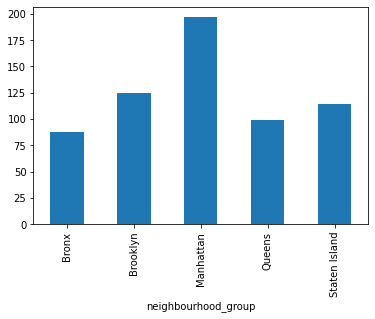

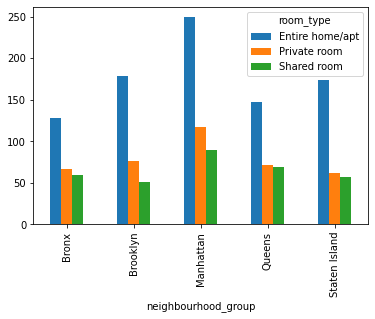

In [7]:
#Finding the average price in each area
average_prices = df.groupby(["neighbourhood_group"])["price"].mean()
#average_prices = average_prices.sort_values(ascending = True)
average_prices.plot(kind = 'bar')

average_prices = df.groupby(["neighbourhood_group",'room_type'])["price"].mean().unstack()
average_prices = average_prices.sort_values(["neighbourhood_group"] , ascending = True)
average_prices.plot(kind = 'bar')

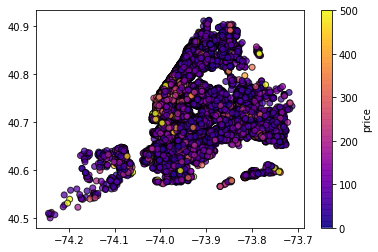

In [8]:
#Understanding the geograpghic distribution of rooms
plt.scatter(df.longitude, df.latitude, c=df.price, cmap='plasma', edgecolor='black', linewidth=1, alpha=0.75)
cbar = plt.colorbar()
plt.clim(0,500)
cbar.set_label('price')

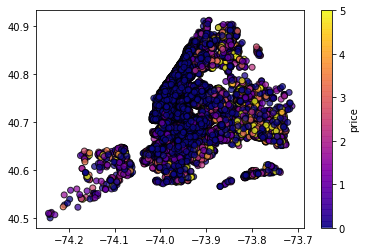

In [21]:
#Understanding the geograpghic distribution of rooms
plt.scatter(df.longitude, df.latitude, c=df.reviews_per_month, cmap='plasma', edgecolor='black', linewidth=1, alpha=0.75)
cbar = plt.colorbar()
plt.clim(0,5)
cbar.set_label('price')

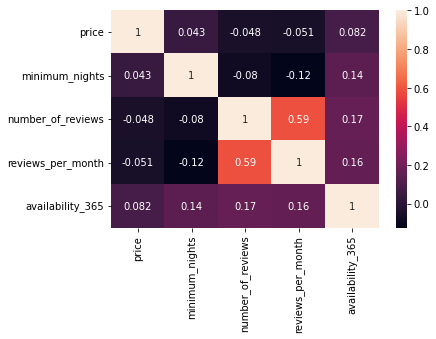

In [10]:
test = df[["price", "minimum_nights" , "number_of_reviews" , "reviews_per_month" , "availability_365"]]
test_corr = test.corr()
test_corr
sns.heatmap(test_corr , annot = True)

In [11]:
df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()


room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                     127.506596     66.788344    59.800000
Brooklyn                  178.327545     76.500099    50.527845
Manhattan                 249.239109    116.776622    88.977083
Queens                    147.050573     71.762456    69.020202
Staten Island             173.846591     62.292553    57.444444

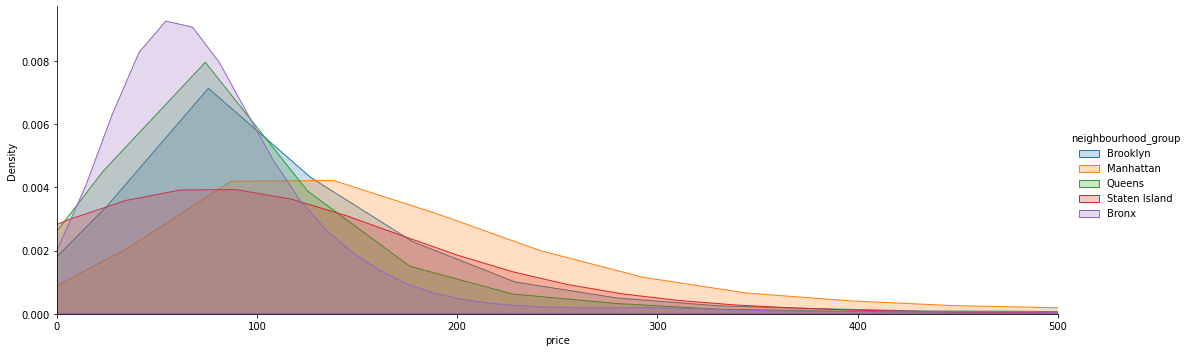

In [14]:
fig = sns.FacetGrid(df, hue="neighbourhood_group", aspect=3, height=5)
fig.map(sns.kdeplot, 'price', shade=True)
oldest = df['price'].max()
fig.set(xlim=(0, 500))
fig.add_legend()

In [13]:
'''x= 'room_type'
y= 'price'
title = 'Price per Neighbourhood Group'
sns.boxplot(x=x, y=y, data=df)
plt.title(title)
plt.ioff()'''

"x= 'room_type'\ny= 'price'\ntitle = 'Price per Neighbourhood Group'\nsns.boxplot(x=x, y=y, data=df)\nplt.title(title)\nplt.ioff()"

In [14]:
df.describe()
#df.loc[df["availability_365"] == 0]

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           1.090910   
std         20.510550          44.550582           1.597283   
min          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.040000   
50%          3.000000           5.000000           0.370000   
75%          5.000000          24.000000           1.580000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [19]:
df.loc[df["minimum_nights"] > 365 ]

id                                 name    host_id   host_name  \
1305     568684  800sqft apartment with huge terrace    2798644  Alessandra   
2854    1615764                                  NaN    6676776       Peter   
5767    4204302     Prime W. Village location 1 bdrm   17550546   Genevieve   
7355    5431845  Beautiful Fully Furnished 1 bed/bth    3680008       Aliya   
8014    6169897            Wonderful Large 1 bedroom   10720264        John   
10829   8341919  Brand New Luxury Apt Lease Takeover   43945071     Shining   
11193   8668115   Zen Room in Crown Heights Brooklyn    8996336       Laura   
13404  10053943   Historic Designer 2 Bed. Apartment    2697686    Glenn H.   
14285  11096888      Peaceful apartment close to F/G    2228137      Amanda   
15946  12888849   Bright Luxury Studio, Central Loc.   16476167       Sarah   
26341  20990053      Beautiful place in Brooklyn! #2  151084261       Angie   
34487  27362309                        Not available   14621589         Sol   
38664  30378211         Shared Studio (females only)  200401254         Meg   
47620  35834935               Williamsburg Apartment   82674375         Meg   

      neighbourhood_group       neighbourhood  latitude  longitude  \
1305             Brooklyn            Bushwick  40.70202  -73.92402   
2854            Manhattan   Battery Park City  40.71239  -74.01620   
5767            Manhattan   Greenwich Village  40.73293  -73.99782   
7355               Queens    Long Island City  40.75104  -73.93863   
8014            Manhattan              Harlem  40.82135  -73.95521   
10829              Queens    Long Island City  40.74654  -73.95778   
11193            Brooklyn       Crown Heights  40.67255  -73.94914   
13404           Manhattan              Harlem  40.82915  -73.94034   
14285            Brooklyn          Kensington  40.64779  -73.97956   
15946           Manhattan             Midtown  40.74513  -73.98475   
26341            Brooklyn        Williamsburg  40.71772  -73.95059   
34487            Brooklyn  Bedford-Stuyvesant  40.69974  -73.94658   
38664           Manhattan   Greenwich Village  40.73094  -73.99900   
47620            Brooklyn        Williamsburg  40.70898  -73.94885   

             room_type  price  minimum_nights  number_of_reviews last_review  \
1305   Entire home/apt    115             370                  6  2018-04-15   
2854   Entire home/apt    400            1000                  0         NaN   
5767   Entire home/apt    180            1250                  2  2014-11-09   
7355   Entire home/apt    134             500                 30  2018-06-24   
8014   Entire home/apt     75             500                  0         NaN   
10829  Entire home/apt    199             480                  0         NaN   
11193     Private room     50             500                 10  2016-09-22   
13404  Entire home/apt     99             999                  2  2018-01-04   
14285     Private room     45             500                  0         NaN   
15946  Entire home/apt    250             366                  0         NaN   
26341     Private room     79             999                 24  2018-06-28   
34487     Private room     50             400                  0         NaN   
38664      Shared room    110             999                  0         NaN   
47620  Entire home/apt    140             500                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
1305                0.09                               1               365  
2854                0.00                               1               362  
5767                0.03                               1               365  
7355                0.57                               1                90  
8014                0.00                               1               362  
10829               0.00                               1               365  
11193               0.22            

In [16]:
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude",
                        color_continuous_scale=["orange", "red",
                                         "green", "blue",
                                         "purple"], zoom=3, height=500, color= "price" , range_color=[0,500])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [45]:
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude",
                        color_continuous_scale=["orange", "red",
                                         "green", "blue",
                                         "purple"], zoom=3, height=500, color= "reviews_per_month" , range_color=[0,2])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [14]:
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude",
                        color_continuous_scale=["orange", "red",
                                         "green", "blue",
                                         "purple"], zoom=3, height=500, color= "number_of_reviews" , range_color=[0,50])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

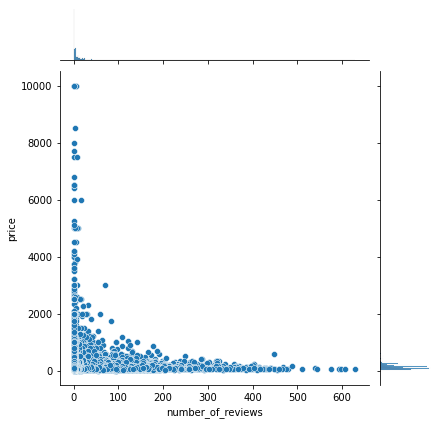

In [47]:
#Price and number of reviews
sns.jointplot(x='number_of_reviews', y='price', data=df)

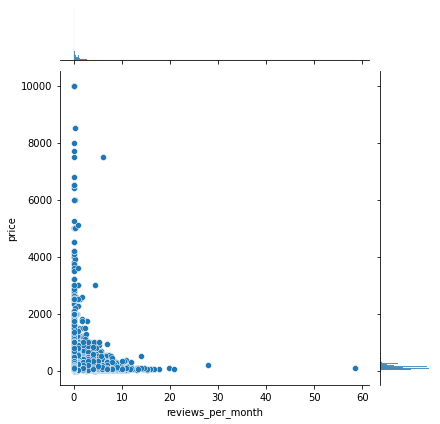

In [48]:
sns.jointplot(x='reviews_per_month', y='price', data=df)